#  Лабораторная работа №1 «Дискретизация аналоговых сигналов»


# Занятие 1. Классификация сигналов: аналоговые, дискретные, цифровые.

In [ ]:
# Обновление библиотеки Matplotlib (требуется >=3.3.4)
!pip3 install --upgrade matplotlib --user 

In [ ]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot

In [ ]:
# Если используете Jupyter, то можно поменять backend
# %matplotlib notebook
%matplotlib inline

 # Задача 0. Введение в Python 3. (Задание к допуску)
 1) Подгрузить библиотеку *Numpy* (`import numpy as np`).

2) Создать массив от 1 до 10 с шагом 2 – [1, 3, 5, 7, 9] – тремя разными способами (используя  три разные функции `np.array()`, `np.arange()`, `np.linspace()`).

3) Создать массив целых чисел от 0 до 100 (размерностью 100 элементов) максимально короткой записью.

4) Создать массив `k`, такой же как описан в п.3. Используя его, создать массив (набор отсчетов) `x`, соответствующий формуле $x[k] = \sin(2\pi \dfrac{f_0}{f_s}k)$, где $\dfrac{f_0}{f_s}$ взять равным 0.07. Следует использовать функцию `np.sin()` и константу `np.pi`.

5) Подгрузить модуль *pyplot* библиотеки *Matplotlib* (`import matplotlib.pyplot as plt`).

6) Создать холст (другие названия полотно, канва) размером 12 на 5 дюйма (`figsize = [12, 5]`).

7) Построить график $x[k]$ (`plt.plot(k, x)`), сделать подписи осей и заголовок графика.

8) Поменять цвет линии графика из п.7 на красный или оранжевый и тип линии на пунктир. Построить на графике отсчеты $x[k]$ с помощью функции `plt.stem(k, x)`, см. Задача 1.1 и Задача 1.2.  
(Для того чтобы поменять тип линии на пунктир, нужно в параметре отвечающем за цвет поставить модификатор "--", например `'--b'`.)

9) Работа с функциями.
  1. Создать функцию, соответствующую формуле $\dfrac{\sin(x)}{x}$. `def my_fun(x):`
  2. Незабыть обработать неопределенность в 0.  
  `if x=0:`  
  ....`return 1`  
  `else`  
  ....`return np.sin(x)/x`
  3. Выполнить п.4 и п.7, создав новый массив значений `y`, используя созданную вами функцию.

10)  Выполнить п.4, только для массива `z`, который соответствует комплексной экспоненциальной функции $z[k] = \exp(-j\,2\pi\,\dfrac{f_0}{f_s}k)$  (функция `np.exp()`). Выполнить п.7, но построить отдельно график реальной и график мнимой частей этой функции.

In [1]:
import numpy as np

In [2]:
mass_array = np.array([1,3,5,7,9])
mass_arange = np.arange(1,10,2)
mass_linspace = np.linspace(1,9,5,dtype = int)

print(mass_array)
print(mass_arange)
print(mass_linspace)


[1 3 5 7 9]
[1 3 5 7 9]
[1 3 5 7 9]


In [3]:
mass_arange = np.arange(0,100)
print(mass_arange)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95
 96 97 98 99]


In [4]:
k = np.arange(0,100)
x = np.sin(2*np.pi*0.07*k)

In [5]:
import matplotlib.pyplot as plt

In [6]:
plt.figure(figsize = [12,5])

<Figure size 864x360 with 0 Axes>

<Figure size 864x360 with 0 Axes>

Text(0.5, 1.0, 'x(k)')

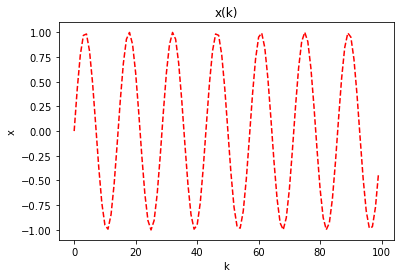

In [7]:
plt.plot(k,x,'--r')
plt.xlabel('k')
plt.ylabel('x')
plt.title('x(k)')

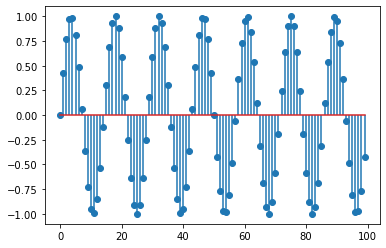

In [8]:
plt.stem(k,x)
plt.show()

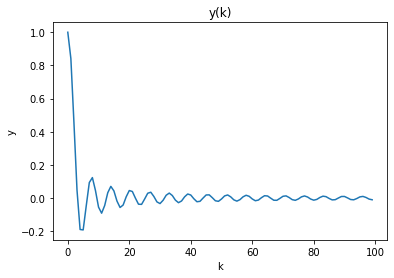

In [9]:
def my_fun(x):
    try:
        return float(np.sin(x))/float(x)
    except ZeroDivisionError:
        return 1

y = list(map(my_fun, k))

plt.plot(k,y)
plt.xlabel('k')
plt.ylabel('y')
plt.title('y(k)')
plt.show()

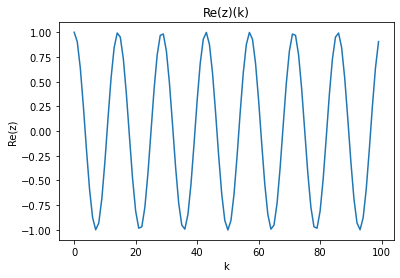

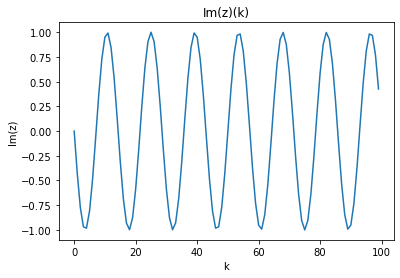

In [10]:
z = np.exp(-1j*2*np.pi*0.07*k)

plt.plot(k,z.real)
plt.ylabel('Re(z)')
plt.xlabel('k')
plt.title('Re(z)(k)')
plt.show()

plt.plot(k,z.imag)
plt.ylabel('Im(z)')
plt.xlabel('k')
plt.title('Im(z)(k)')
plt.show()

# Задача 1.1. Дискретизация и квантование.

## 1) Как соотносится растояние между отсчетами по оси времени с частотой дискретизации?

**Ответ:** Растояние между отсчетами являются шагом дискретизации $\Delta t$, а в свою очередь частота дискретизации представима как $ f_0 = \frac{1}{\Delta t}$

In [1]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
def quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=5):
    """Uniform quantization approach
    From: Müller M. Fundamentals of music processing: Audio, analysis, algorithms, applications. – Springer, 2015.
    Notebook: C2S2_DigitalSignalQuantization.ipynb
    Args:
        x: Original signal
        quant_min: Minimum quantization level
        quant_max: Maximum quantization level
        quant_level: Number of quantization levels
    Returns:
        x_quant: Quantized signal
    """
    x_normalize = (x-quant_min) * (quant_level-1) / (quant_max-quant_min)
    x_normalize[x_normalize > quant_level - 1] = quant_level - 1
    x_normalize[x_normalize < 0] = 0
    x_normalize_quant = np.around(x_normalize)
    x_quant = (x_normalize_quant) * (quant_max-quant_min) / (quant_level-1) + quant_min
    return x_quant

In [2]:
N=12                                    # Число отсчетов по времени
f0=200.0                                # Частота синусоиды в Гц
fs=600.0                               # Частота дискретизации в Гц
k=np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x=np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels=50                     # число уровней квантования

C:\Users\nbert\AppData\Local\Temp\ipykernel_14544\1018700587.py:8: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')


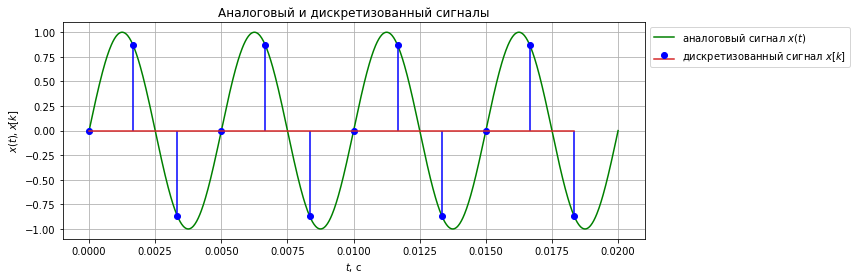

In [3]:
        # Построение графиков аналогового и дискретизованного сигнала
plt.figure(figsize=[12, 4])              # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)        # создание массива времен t (1024 значения от 0 до N*fs)

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                        # построение графика x(t) (точки соединяются линиями)
                                        # 'g' означает, что используется зеленая линия (green)
plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')            
                                        # построение графика функции дискретного времени x[k]
                                        # 'b', 'bo' означает, что отсчеты оборажаются синим цветом (blue)
plt.grid()                              # сетка
plt.xlabel("$t$, c")                    # подпись оси X
plt.ylabel("$x(t), x[k]$")              # подпись оси Y
plt.title("Аналоговый и дискретизованный сигналы") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                      # автоматическая корректировка расположения осей графика

In [14]:
# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

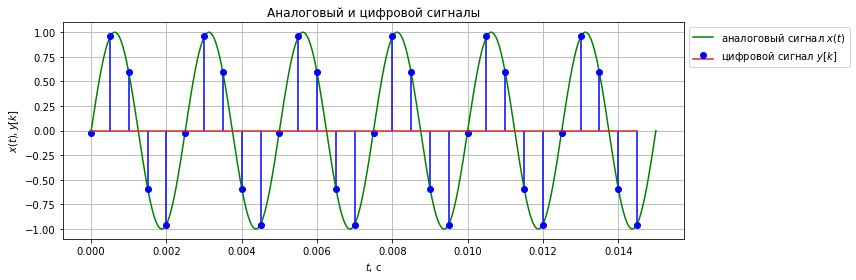

In [15]:
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[12, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')                
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м
    
if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

### 2) Как изменяется абсолютная ошибка квантования $\varepsilon[k]=|x[k]-y[k]|$ с ростом числа уровней квантования?

**Ответ:** При повышении числа уровней квантавания ошибка уменьшается

In [16]:
num_levels = 50 
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels) # num_levels  = 50
abs(x-y) # для 50

array([0.02040816, 0.00812716, 0.00405148, 0.00405148, 0.00812716,
       0.02040816, 0.00812716, 0.00405148, 0.00405148, 0.00812716,
       0.02040816, 0.00812716, 0.00405148, 0.00405148, 0.00812716,
       0.02040816, 0.00812716, 0.00405148, 0.00405148, 0.00812716,
       0.02040816, 0.00812716, 0.00405148, 0.00405148, 0.00812716,
       0.02040816, 0.00812716, 0.00405148, 0.00405148, 0.00812716])

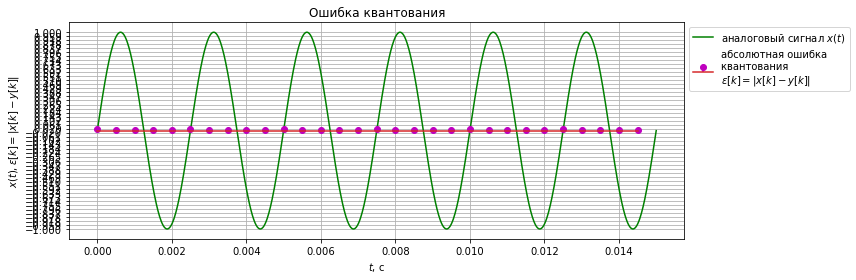

In [17]:
plt.figure(figsize=[12, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

In [18]:
num_levels = 90
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels) # num_levels  = 90
abs(x-y) #для 90

array([0.01123596, 0.00399966, 0.00772037, 0.00772037, 0.00399966,
       0.01123596, 0.00399966, 0.00772037, 0.00772037, 0.00399966,
       0.01123596, 0.00399966, 0.00772037, 0.00772037, 0.00399966,
       0.01123596, 0.00399966, 0.00772037, 0.00772037, 0.00399966,
       0.01123596, 0.00399966, 0.00772037, 0.00772037, 0.00399966,
       0.01123596, 0.00399966, 0.00772037, 0.00772037, 0.00399966])

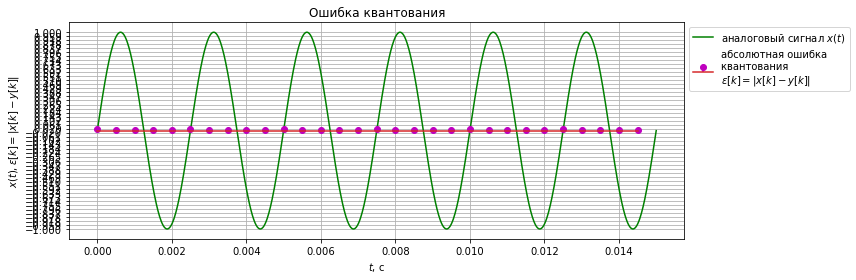

In [19]:
plt.figure(figsize=[12, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()

# Задача 1.2. Декодирование .wav файла

### 1) Определите частоту дискретизации, битную глубину записи (соотвествует dtype) и соотвествующее ей колличество уровней квантования.

**Ответ:** $f_s = 96000$, Количесто уровней квантования зависит от битной глубины записи. Тк тип 32-х битный то кол-во уровней квантования $ n = 2^{32}-1 = 4294967295 $ 

### 2) Сравните растояние между отсчетами по оси времени на графике с частотой дискретизации.

**Ответ:** $ \Delta t = \frac{1}{f_s} = \frac{1}{96000} $

### 3) Поменяйте ось времени так, чтобы первому отсчету наблюдаемого диапазона соотвествовало время от начала файла.

**Ответ:** Done

### 4) Определите длину записи в секундах.

**Ответ:** 1.3476354166666666 сек

### 5) Оцените объем файла в килобайтах (КБ), при условии, что никакое дополнительное сжатие не производится (использовать данные о частоте дискретизации, числе отсчетов и битовой глубине). Сравние с реальным объемом файла. 

**Ответ:**  объем файла: size = dtype ∗ n, где n = 129373 число измерений, dtype 4 байта =>
505.36328125 кб. Реальный размер  505.40625 байта

In [20]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.io.wavfile # импорт модуля scipy.io.wavfile

In [21]:
from IPython.display import Audio
Audio('glockenspiel.wav')

In [22]:
fs, x = scipy.io.wavfile.read('glockenspiel.wav') # чтение аудиофайла 

In [23]:
print(fs)     #частота дискретизации в Гц
dt = 1/fs
print(dt)

96000
1.0416666666666666e-05


In [24]:
x      #массив значений x[k]

array([ 2866176, 10163712, 49860096, ..., 12109568, 12324864, 12034560])

In [25]:
print(x.dtype)
n = 2**32-1
print(n)

int32
4294967295


In [26]:
x.size

129373

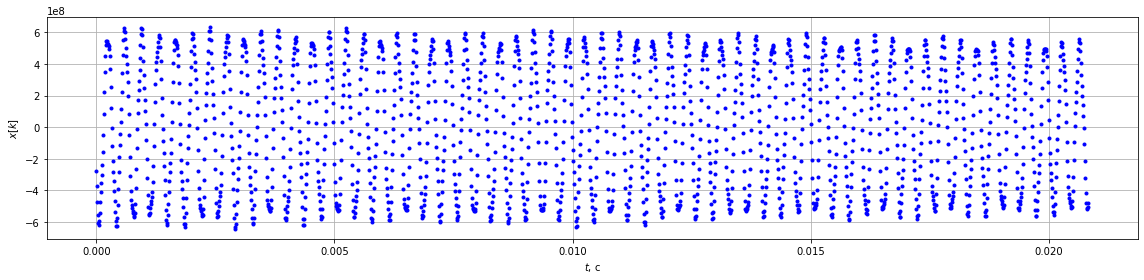

In [27]:
x1=x[8000:10000]                     # выбор наблюдаемого диапазона
k=np.arange(x1.size)               # отсчеты по времени
# Построение графиков 
plt.figure(figsize=[16, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.plot(k/fs, x1, 'b.')           # построение графика цифрового сигнала точками точками
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$")             
plt.tight_layout()


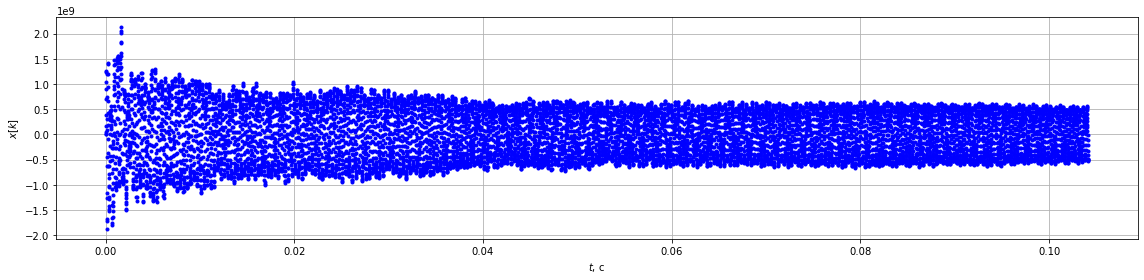

In [28]:
x1=x[:10000]                     # выбор диапазона начиная с нуля
k=np.arange(x1.size)               # отсчеты по времени
# Построение графиков 
plt.figure(figsize=[16, 4])         # создание полотна размером шириной 8 X 4 дюйма
plt.plot(k/fs, x1, 'b.')           # построение графика цифрового сигнала точками точками
plt.grid()                             
plt.xlabel("$t$, c")                      
plt.ylabel("$x[k]$")             
plt.tight_layout()


In [31]:
x.size * dt  # продолжительность сигнала в секундах

1.3476354166666666

In [37]:
x.size * 4 / 1024 


505.36328125

In [3]:
import os.path

os.path.getsize('glockenspiel.wav')/1024 # реальный размер файла

505.40625

# Занятие 2. Спектры импульсных и периодических сигналов.

In [4]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot
import scipy.integrate as integrate # импорт модуля численного интегрирования

def integrate_function(t, func, f, tau, real_part=True):
    # Подынтегральное выражение для использованиия в функции integrate.quad
    # t - время
    # func - функция, задающая импульс
    # f - частота
    # tau - константа, используемая для задания длительности импульса
    if real_part:
        return func(t, tau)*np.cos(-2*np.pi*f*t)  # действительная часть интеграла
    else:
        return func(t, tau)*np.sin(-2*np.pi*f*t)  # мнимая часть интеграла

def fourier_transform(signal, f_band, tau, t1, t2, res_type='abs'):
    # вычисление преобразования Фурье для набора частот
    # signal - функция от t и tau, задающая сигнал во временной области 
    # f_band - набор частот, для которых вычисляется преобразование Фурье
    # tau - константа, используемая для задания длительности импульса
    # t1 момент начала сигнала
    # t2 момент завершения сигнала
    # тип возвращаемого значения:
    # res_type='abs' - |X(f)|
    # res_type='Re' - Re X(f)
    # res_type='Im' - Im X(f)
    if res_type=="abs":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return abs(Re+1j*Im)
    elif res_type=="Re":
        Re=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, True))[0] for f in f_band])
        return Re
    elif res_type=="Im":
        Im=np.array([integrate.quad(integrate_function, t1, t2, args=(signal, f, tau, False))[0] for f in f_band])
        return Im

## Задача 2.1. Спектры симметричных оконных функций 

$\tau = 1000$

Ниже приведен пример вычисления модуля спектральной плотности $|X(f)|$ для прямоугольного окна длительностью $\tau=150$ мкс. 

Для заданного параметра $\tau$ из таблицы, построить графики модуля спектральной плотности $|X(f)|$ для прямоугольного окна, 
$$w_b(t)=\left\{ \begin{matrix}
   1, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2; \\
\end{matrix} \right.$$
треугольного окна
$$w_t(t)=\left\{ \begin{matrix}
   1-\dfrac{|t|}{\tau /2}, & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$
 и окна Ханна
$$w_H(t)=\left\{ \begin{matrix}
   \dfrac{1}{2}\left( 1+\cos \left( 2\pi \dfrac{t}{\tau } \right) \right), & \text{ }\text{если }|t|\le \tau /2,  \\
   0, & \text{ }\text{если }|t|>\tau /2.  \\
\end{matrix} \right.$$



Привести аналитические формулы спектральной плотности для этих импульсов. 
Определить 
* а) уровни первого бокового лепестка относительно главного в $|X(f)|$ (практич.) в дБ ($20\lg  \left|\dfrac{X(f)}{X(0)}\right| $ ),
* б) расположение нулей $|X(f)|$ (практич. и теоретическое).

Заполнить таблицу для трех окон.


| Окна  |   Уровень первого бокового лепестка относительно главного, дБ  |  Ширина главного лепестка, Гц  |
|:-----------:|:---:|:---:|
| прямоугольное |     |       |
| треугольное |     |       |
| Ханна |     |       |

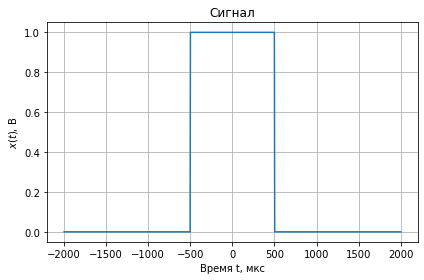

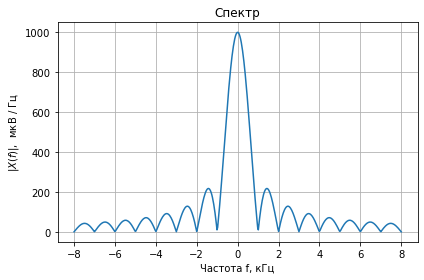

In [10]:
import numpy as np # импорт бибилиотеки numpy
import matplotlib.pyplot as plt # импорт модуля matplotlib.pyplot

tau=1000e-6 #100 мкс

f_band=np.linspace(-8/tau, 8/tau, 500) # 500 - число точек в диапазоне, в которых вычисляется X(f)

def boxcar(t, tau):
    if abs(t)<tau/2:
        return 1.0                 
    else:
        return 0.0                 
    
t_band=np.linspace(-2*tau, 2*tau, 1024)
plt.figure(figsize=[6, 4])
plt.plot(t_band*1e6, [boxcar(t, tau) for t in t_band])
plt.xlabel("Время t, мкс")
plt.ylabel("$x(t)$, В")
plt.title("Сигнал")
plt.tight_layout() 
plt.grid()

plt.figure(figsize=[6, 4])
plt.plot(f_band/1e3, fourier_transform(signal=boxcar, f_band=f_band, tau=tau, t1=-tau/2, t2=tau/2, res_type="abs")*1e6)
plt.xlabel("Частота f, кГц")
plt.ylabel("$|X(f)|$,  мкВ / Гц")
plt.title("Спектр")
plt.tight_layout() 
plt.grid()
plt.show()

In [9]:
plt.show()

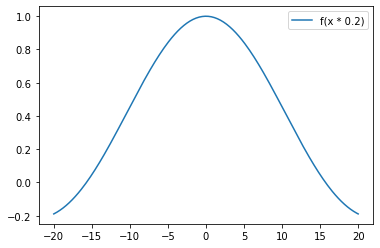

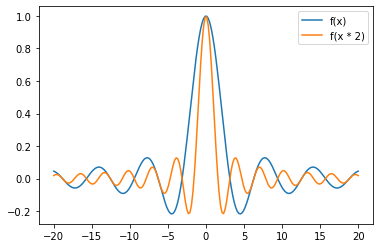

In [11]:
import matplotlib.pyplot as plt
import numpy as np


if __name__ == '__main__':
    # Интервал изменения переменной по оси X и количество точек на этом интервале
    xmin = -20.0
    xmax = 20.0
    count = 200

    # Создадим список координат по оси X на отрезке [xmin; xmax], включая концы
    x = np.linspace(xmin, xmax, count)

    # Вычислим значение функции в заданных точках
    y1 = np.sinc(x / np.pi)
    y2 = np.sinc(x / np.pi * 0.2)
    y3 = np.sinc(x / np.pi * 2.0)

    # !!! Нарисуем график в первом окне
    plt.figure(1)
    plt.plot(x, y1, label="f(x)")

    # !!! Нарисуем график во втором окне
    plt.figure(2)
    plt.plot(x, y2, label="f(x * 0.2)")
    plt.legend()

    # !!! Нарисуем еще один график в первом окне
    plt.figure(1)
    plt.plot(x, y3, label="f(x * 2)")
    plt.legend()

    # Покажем окна с нарисованными графиками
    plt.show()